#### Лабораторная работа 3. Имитация систем непрерывных и дискретных случайных величин
Написать программу, реализующую метод формирования двумерной НСВ с определенным распределением. Написать программу, реализующую метод формирования двумерной ДСВ.

$----------------------------------------------$

In [97]:
import math
import random
import numpy as np
import scipy.stats as st
import scipy.integrate as intgr
import matplotlib.pyplot as plt

rounds = 100000
a = 0
b = 1

<b>Задание 1.</b> Запишем функцию распределения

In [98]:
def distribution(x, y):
    return 2 * (x ** 2 + y/3)

distribution_max = distribution(1,1)
distribution_max

2.6666666666666665

-------------------------------------------------------
Получим <b>безусловные плотности вероятностей</b> по следующим формулам:

$$
f(x) = \int_{0}^{1} f(x, y)dy
$$
$$
f(y) = \int_{0}^{1} f(x, y)dx
$$

In [99]:
def intgr_x(x: float): 
    if x > 1 or x < 0:
        return 0
    return 2 * x ** 2 + 1/3
def intgr_y(y: float): 
    if y > 1 or y < 0:
        return 0
    return 2 * (y + 1) / 3

Имея эти данные можно найти <b>безусловные математические ожидания</b> $M(Y)$ и $M(X)$ для $f(y)$ и $f(x)$ соотвественно. Для этого применим формулы:

$$
M(X) = \int_{0}^{1} xf(x)dx
$$
$$
M(Y) = \int_{0}^{1} yf(y)dy
$$

In [100]:
m_x_theor = intgr.quad(lambda x: x * intgr_x(x), a, b)[0]
m_y_theor = intgr.quad(lambda y: y * intgr_y(y), a, b)[0]

print(f"M(X) = {m_x_theor}")
print(f"M(Y) = {m_y_theor}")

M(X) = 0.6666666666666666
M(Y) = 0.5555555555555556


Теперь получим <b>безусловные дисперсии</b> $D(X)$ и $D(Y)$. Для этого используем формулы:

$$
D(X) = \int_{0}^{1} {x}^{2}f(x)dx - M(X)^{2}
$$

$$
D(Y) = \int_{0}^{1} {y}^{2}f(y)dx - M(Y)^{2}
$$

In [101]:
d_x_theor = intgr.quad(lambda x: x ** 2 * intgr_x(x), a, b)[0] - m_x_theor ** 2
d_y_theor = intgr.quad(lambda y: y ** 2 * intgr_y(y), a, b)[0] - m_y_theor ** 2

print(f"D(X) = {d_x_theor}")
print(f"D(Y) = {d_y_theor}")

D(X) = 0.06666666666666676
D(Y) = 0.08024691358024694


-----------------------------------------------------------------------------------
Теперь запишем <b>условные</b> плотности распределения по следующим формулам:

$$
f(x | Y = y) = \frac{f(x, y)}{f(y)}
$$
$$
f(y | X = x) = \frac{f(x, y)}{f(x)}
$$

In [102]:
def real_x(x, y): 
    if x > 1 or x < 0:
        return 0
    return (3 * x ** 2 + y) / (y + 1)

def real_y(y, x): 
    if y > 1 or y < 0:
        return 0
    return 2*(x**2 + y/3) / (2*x**2 + 1/3)

Для вычисления <b>условного матожидания (регрессии функции)</b> используем формулы:

$$
M(x | Y = y) = \int_{0}^{1} {x}f(x | Y = y)dx
$$
$$
M(y | X = x) = \int_{0}^{1} {y}f(y | X = x)dy
$$

In [103]:
m_x_relative_theor_list, m_y_relative_theor_list = [], []

for i in range(0, 1001):
    j = i / 1000
    
    m_x_relative_theor_list.append(intgr.quad(lambda x: x * real_x(x, j), a, b)[0])
    m_y_relative_theor_list.append(intgr.quad(lambda y: y * real_y(y, j), a, b)[0])

print(f"M(x| Y=y) = {sum(m_x_relative_theor_list)/len(m_x_relative_theor_list)}")
print(f"M(y| X=x) = {sum(m_y_relative_theor_list)/len(m_y_relative_theor_list)}")

M(x| Y=y) = 0.6733010097552284
M(y| X=x) = 0.580521251836125


Для вычисления <b>условной дисперсии</b> используем формулы:

$$
D(x | Y = y) = \int_{0}^{1} {x}^{2}f(x | Y = y)dx - M(x | Y = y)^2
$$
$$
D(y | X = x) = \int_{0}^{1} {y}^{2}f(y | X = x)dy - M(y | X = x)^2
$$

In [104]:
d_x_relative_theor_list, d_y_relative_theor_list = [], []

for i in range(0, 1001):
    j = i / 1000

    d_x_relative_theor_list.append(intgr.quad(lambda x: x ** 2 * real_x(x, j), a, b)[0] - m_x_relative_theor_list[i] ** 2)
    d_y_relative_theor_list.append(intgr.quad(lambda y: y ** 2 * real_y(y, j), a, b)[0] - m_y_relative_theor_list[i] ** 2)

print(f"D(x| Y=y) = {sum(d_x_relative_theor_list)/len(d_x_relative_theor_list)}")
print(f"D(y| X=x) = {sum(d_y_relative_theor_list)/len(d_y_relative_theor_list)}")

D(x| Y=y) = 0.06362892018290127
D(y| X=x) = 0.07463485445494641


--------------------------------------------------------------------------------------
Получим значения для исследований методом Неймана. Учтем ограничения из варианта $0 \leq x, y \leq 1$

In [105]:
x_list, y_list = [], []
for i in range(rounds):
    while True:
        x, y = a + random.random() * (b - a), a + random.random() * (b - a) 
        z =  random.random() * distribution_max
        
        if distribution(x, y)> z:
            x_list.append(x)
            y_list.append(y)
            break 

Теперь можно проверить практические значения <b>матожидания</b> и <b>дисперсии</b>

In [106]:
m_x_act = sum(x_list) / rounds
m_y_act = sum(y_list) / rounds

print(f"M(X)' = {m_x_act}")
print(f"M(Y)' = {m_y_act}")

M(X)' = 0.6686121636029632
M(Y)' = 0.5557876716163235


In [107]:
d_x_act = (sum([element ** 2 for element in x_list]) / rounds) - ((sum(x_list) / rounds) ** 2)
d_y_act = (sum([element ** 2 for element in y_list]) / rounds) - ((sum(y_list) / rounds) ** 2)

print(f"D(X)' = {d_x_act}")
print(f"D(Y)' = {d_y_act}")

D(X)' = 0.066307895796208
D(Y)' = 0.08000879518101944


Найдем <b>коэффициенты корреляции</b>

In [108]:
m_x_y_theor = intgr.dblquad(lambda x, y: x * y * distribution(x, y), a, b, a, b)[0]
r_theor = (m_x_y_theor - m_x_theor * m_y_theor) / math.sqrt(d_x_theor * d_y_theor)

print(f"r = {r_theor}")

r = -0.12659242088545727


In [109]:
r_act = st.pearsonr(x_list, y_list)[0]

print(f"r' = {r_act}")

r' = -0.12859641397049007


Проверим, <b>зависимы</b> ли величины друг от друга

In [110]:
x_1 = random.uniform(0, 1)
y_1 = random.uniform(0, 1)

if distribution(x_1, y_1) != intgr_x(x_1) * intgr_y(y_1):
    print("Величины зависимы")
else:
     print("Независимы")

Величины зависимы


----------
Построим 3D график

TypeError: subplot() takes 1 or 3 positional arguments but 2 were given

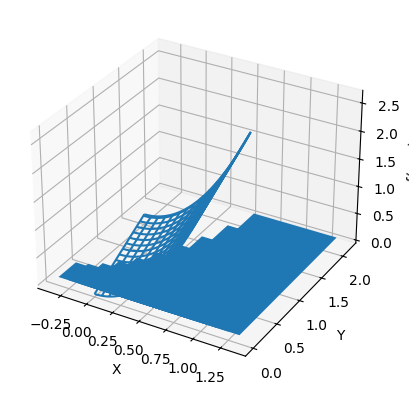

In [111]:
x = np.linspace(a, b, 1000)
y = np.linspace(a, b, 1000)

X, Y = np.meshgrid(x, y)

Z = distribution(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  
ax.plot_wireframe(X, Y, Z, cmap='viridis', rstride=70, cstride=70)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x, y)')

plt.show()


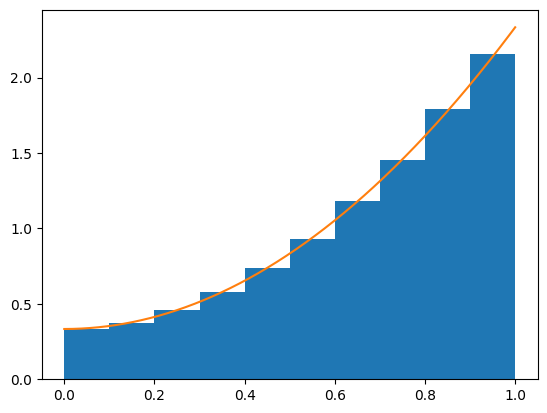

In [112]:
x_ = np.linspace(a, b, 1000)
fx_x = [intgr_x(x_) for x_ in x_]
plt.hist(x_list, density=True)
plt.plot(x_, fx_x)
plt.show()

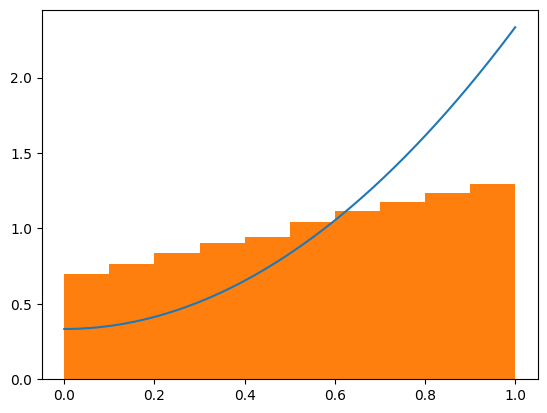

In [113]:
y_ = np.linspace(a, b, 1000)
fy_y = [intgr_x(y_) for y_ in y_]
plt.plot(y_, fy_y)
plt.hist(y_list, density=True)
plt.show()